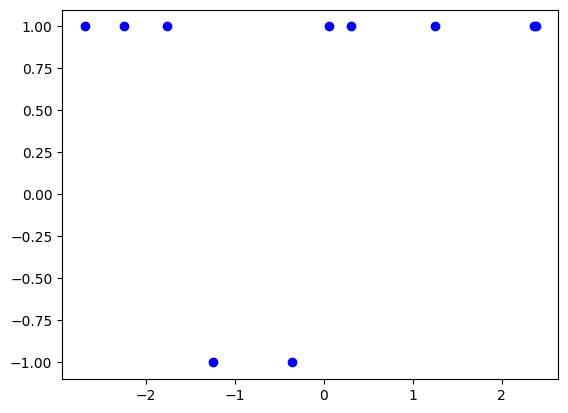

In [47]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
import joblib # for saving and loading the model
import matplotlib.pyplot as plt

x = np.array([-2.69, -2.25, -1.76, -1.25, -0.36, 0.06, 0.30, 1.25, 2.36, 2.38]).reshape(-1,1)
y = np.array([1,1,1,-1 ,-1,1,1,1,1, 1]).reshape(-1,1)
x_test = np.array([-2.45, -1.84, 0.06, 1.30, 1.96]).reshape(-1,1)

fig, ax = plt.subplots()
ax.scatter(x, y, c="blue")

Can you code a small function that returns a MajorityVote classifier (assume binary features and labels for simplicity)? If I gave you code for those functions, would you be able to tell me what they do?


In [25]:
def mv_classifier(trees,x):
    n = len(x)
    all_preds_list = []

    for tree in trees:
        y_preds = tree.predict(x)
        all_preds_list.append(y_preds)

    all_preds = np.vstack(all_preds_list)
    
    majority_preds = np.round(all_preds.mean(axis=0)).astype(int)
    
    # Return majority_preds
    return majority_preds


In [26]:
# RUN AS MAIN  
r = 3
trees = []
for i in range(r):
    tree = DecisionTreeClassifier(max_depth = 1)
    tree.fit(x,y)
    trees.append(tree)

    
# Call majority vote function
mv = mv_classifier(trees,x)
mv_value = mv.mean()
print(mv)

[1 1 1 1 1 1 1 1 1 1]


Can you code a small function that returns a Memorizer classifier? If I gave you code for those functions, would you be able to tell me what they do?


In [ ]:
def memorizer(mv, x, y, x_test):
    mem_preds = []
    n = len(x_test)
    
    # If x_test is in x, return y
    for i in range(0,n):
        index = np.where((x_test[i] == x).all(axis=1))[0]

        if index.size > 0:
            mem_preds.append(y[i,0])

        # If x_test is not in x, return mv
        else:
            mem_preds.append(mv)

    # Make y_preds into an array 
    mem_preds = np.array(mem_preds)

    # Return memorizer predictions 
    return mem_preds


1.0
[1. 1. 1. 1. 1.]


In [ ]:
# RUN AS MAIN  
r = 3
trees = []
for i in range(r):
    tree = DecisionTreeClassifier(max_depth = 1)
    tree.fit(x,y)
    trees.append(tree)

# Call majority vote function
mv = mv_classifier(trees,x)
mv_value = mv.mean()
# print(mv_value)

# Call memorizer function 
mem = memorizer(mv_value, x, y, x_test)

# Return memorizer predictions
print(mem)

1.0
[1. 1. 1. 1. 1.]


Can you code a small function that returns a DecisionStump classifier? If I gave you code for those functions, would you be able to tell me what they do?



In [43]:
stump = DecisionTreeClassifier(max_depth = 1) # additional argument is random_state =
stump.fit(x,y) # additional arguments is sample_weights =
y_pred = stump.predict(x)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1]


If I gave you code for evaluating a model, would you be able to tell me what it is doing?


For functions that you import into your code from scikit-learn, what modules are the sources of those functions? For example, mean_absolute_error is in ... ... ... ... ... ... ... ... ... sklearn.metrics.


In [44]:
import pandas as pd 
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

from sklearn.inspection import DecisionBoundaryDisplay

import joblib # for saving and loading the model
import matplotlib.pyplot as plt

import os
import sys
import warnings

Would you be able to perform a split of data into train and test sets using scikit-learn? What about without it?

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 42) # random_state is the seed

# Define test/train ratio
test_ratio = 0.2
train_ratio = 1 - test_ratio

# Randomize x and y
data = np.hstack([x,y])
np.random.shuffle(data)
n = len(y)

# Split train and test data 
split_ind = int(n*test_ratio)
test_data = data[: split_ind, :]
train_data = data[split_ind:, :]

# Split x and y
x_test = test_data[:, :-1]
y_test = test_data[:, -1].reshape(-1,1)

x_train = train_data[:, :-1]
y_train = train_data[:, -1].reshape(-1,1)

# Print to check

print("X_train:\n", x_train)
print("X_test:\n", x_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)




X_train:
 [[ 2.36]
 [-0.36]
 [-2.69]
 [ 0.06]
 [ 0.3 ]
 [-1.25]
 [-1.76]
 [-2.25]]
X_test:
 [[1.25]
 [2.38]]
y_train:
 [[ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]]
y_test:
 [[1.]
 [1.]]


What are possible functions that you can call to do cross validation? Where are these functions located in scikit-learn (how do you import them)? What arguments do those functions take?


In [51]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')

# estimator = DecisionTreeClassifier, DecisionTreeRegressor 
# x array
# y array
# cv = to specify the number of folds
# scoring = accuracy, neg_mean_squared_error, neg_mean_absolute_error, neg_max_error, neg_root_mean_squared_error

/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Note: you do not need to know all the possible arguments and what values they can take, but, for example, you should know how to choose the weight on the regularization term for lasso/ridge regularization. And you should know the effect of changing some of these common function parameters (for example, what does changing alpha do for ridge regularization, or how do you change the size of the train/test data splits?).



In [54]:
# Linear regression
linear_model = LinearRegression()
linear_model.fit(x,y)
y_pred_lin = linear_model.predict(x_test)
train_mse_lin = mean_squared_error(y_train, linear_model.predict(x_train))
test_mse_lin = mean_squared_error(y_test, y_pred_lin)
selected_features_lin = np.sum(linear_model.coef_ != 0)
avg_coefficient_lin = np.mean(np.abs(linear_model.coef_[linear_model.coef_ != 0])) if selected_features_lin > 0 else 0

# Lasso regression 
# alphas = value of penalty hyperparameter lambda to test
# cv = number of folds
lasso_model = LassoCV(alphas=np.logspace(-3, 2, 50), cv=5, random_state=42)
lasso_model.fit(x,y)
y_pred_lasso = lasso_model.predict(x_test)
train_mse_lasso = mean_squared_error(y_train, lasso_model.predict(x_train))
test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)
best_lasso_alpha = lasso_model.alpha_  # high alpha = stronger regularization, more coefficeints are exacly zero
selected_features_lasso = np.sum(lasso_model.coef_ != 0)
avg_coefficient_lasso = np.mean(np.abs(lasso_model.coef_[lasso_model.coef_ != 0])) if selected_features_lasso > 0 else 0

# Ridge regression
# alphas = value of penalty hyperparameter lambda to test
# cv = number of folds
ridge_model =  RidgeCV(alphas = np.logspace(-3, 2, 50), cv=5)
ridge_model.fit(x,y)
y_pred_ridge = ridge_model.predict(x_test)
train_mse_ridge = mean_squared_error(y_train, ridge_model.predict(x_train))
test_mse_ridge = mean_squared_error(y_test, y_pred_ridge)
best_ridge_alpha = ridge_model.alpha_ # high alpha = stronger regularization, more coefficeints are near but not exactly zero
selected_features_ridge = np.sum(ridge_model.coef_ != 0)
avg_coefficient_ridge = np.mean(np.abs(ridge_model.coef_[ridge_model.coef_ != 0])) if selected_features_ridge > 0 else 0


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1705: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
